In [1]:
import torch
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from rdkit import Chem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
import matplotlib.pyplot as plt
import json

In [2]:
import sys
sys.path.insert(0, "/data/yzhouc01/MassSpecGym")
sys.path.insert(0, "/data/yzhouc01/FILIP-MS")

from rdkit import RDLogger
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from massspecgym.models.base import Stage
import os

from mvp.utils.data import get_spec_featurizer, get_mol_featurizer, get_ms_dataset,get_test_ms_dataset
from mvp.utils.models import get_model

from mvp.definitions import TEST_RESULTS_DIR
import yaml
from functools import partial
# Suppress RDKit warnings and errors
lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)

In [3]:
# Load model and data
# param_pth = '/data/yzhouc01/FILIP-MS/experiments/20250824_filipContrastive/lightning_logs/version_0/hparams.yaml'
param_pth = "/data/yzhouc01/FILIP-MS/mvp/params_formSpec.yaml"
with open(param_pth) as f:
    params = yaml.load(f, Loader=yaml.FullLoader)
# params['dataset_pth'] = "/data/yzhouc01/MVP/data/sample/data.tsv"

spec_featurizer = get_spec_featurizer(params['spectra_view'], params)
mol_featurizer = get_mol_featurizer(params['molecule_view'], params)
dataset = get_test_ms_dataset(params['spectra_view'], params['molecule_view'], spec_featurizer, mol_featurizer, params)

Data path:  /r/hassounlab/spectra_data/msgym/MassSpecGym.tsv
Processing formula spectra


100%|██████████| 231104/231104 [50:06<00:00, 76.87it/s]  


In [4]:
dataset.spectra[1].metadata

{'precursor_mz': 288.1225,
 'formulas': array(['C7H6', 'C6H4O3', 'C13H12O', 'C14H12O3', 'C14H15NO3', 'C16H17NO4'],
       dtype='<U9'),
 'precursor_formula': 'C16H18NO4'}

In [4]:
dataset.spectra[0].metadata

{'precursor_mz': 226.0716,
 'formulas': array(['C5H5O2', 'C6H6O', 'C3H4NO3', 'C7H6O', 'C6H3O2', 'C3H5NO4',
        'C7H6O2', 'C7H6NO2', 'C8H4NO2', 'C7H6NO3', 'C8H9NO3', 'C7H6NO5',
        'C9H8NO4', 'C10H10NO4', 'C10H11NO5'], dtype='<U9'),
 'precursor_formula': 'C10H12NO5'}

In [9]:
dataset.spectra[0].metadata

{'precursor_mz': 226.0716,
 'formulas': array(['C6H6O', 'C4H3O3', 'C5H5O2', 'C6H6O', 'C4H3O3', 'C5H5O2',
        'C3H4NO3', 'C7H6O', 'C7H6O', 'C6H3O2', 'C6H3O2', 'C3H5NO4',
        'C7H6O2', 'C7H6O2', 'C7H6O2', 'C7H6O2', 'C7H6NO2', 'C7H6NO2',
        'C7H6NO2', 'C8H4NO2', 'C8H4NO2', 'C7H6NO3', 'C8H9NO3', 'C8H9NO3',
        'C8H9NO3', 'C8H9NO3', 'C8H10NO4', 'C7H9NO5', 'C7H6NO5', 'C9H8NO4',
        'C10H10NO4', 'C9H8NO5', 'C10H11NO5'], dtype='<U9'),
 'precursor_formula': 'C10H12NO5'}

# SIRIUS subformulas

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

# Collect number of formulas per spectrum
n_formulas = [len(d.metadata['formulas']) for d in dataset.spectra]

# Calculate mean and median
mean_n_formulas = np.mean(n_formulas)
median_n_formulas = np.median(n_formulas)

# Plot histogram
plt.hist(n_formulas, bins=30, alpha=0.7, color='skyblue')
plt.axvline(mean_n_formulas, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_n_formulas:.2f}')
plt.axvline(median_n_formulas, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_n_formulas:.2f}')
plt.xlabel('Number of formulas per spectrum')
plt.ylabel('Count')
plt.title('Distribution of Number of Formulas per Spectrum (SIRIUS labels)')
plt.legend()
plt.show()

# MIST subformulas

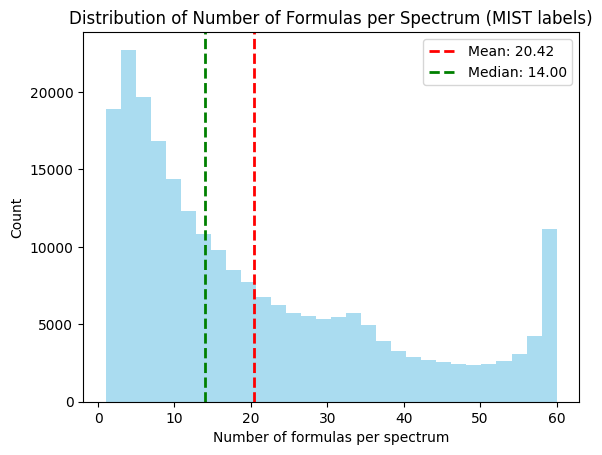

In [17]:
import numpy as np

import matplotlib.pyplot as plt

# Collect number of formulas per spectrum
n_formulas = [len(d.metadata['formulas']) for d in dataset.spectra]

# Calculate mean and median
mean_n_formulas = np.mean(n_formulas)
median_n_formulas = np.median(n_formulas)

# Plot histogram
plt.hist(n_formulas, bins=30, alpha=0.7, color='skyblue')
plt.axvline(mean_n_formulas, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_n_formulas:.2f}')
plt.axvline(median_n_formulas, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_n_formulas:.2f}')
plt.xlabel('Number of formulas per spectrum')
plt.ylabel('Count')
plt.title('Distribution of Number of Formulas per Spectrum (MIST labels)')
plt.legend()
plt.show()

In [7]:
dataset.metadata.iloc[0]

identifier                                           MassSpecGymID0000001
mzs                     91.0542,125.0233,154.0499,155.0577,185.0961,20...
intensities             0.24524524524524524,1.0,0.08008008008008008,0....
smiles                      CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC
inchikey                                                   VFMQMACUYWGDOJ
formula                                                         C16H17NO4
precursor_formula                                               C16H18NO4
parent_mass                                                    287.115224
precursor_mz                                                     288.1225
adduct                                                             [M+H]+
instrument_type                                                  Orbitrap
collision_energy                                                     30.0
fold                                                                train
simulation_challenge                  

In [9]:
import json
spec_id = dataset.metadata.iloc[123]['identifier']
file = os.path.join(params['subformula_dir_pth'], spec_id+".json")
with open(file) as f:
    data = json.load(f)

PermissionError: [Errno 13] Permission denied: '/r/hassounlab/msgym_sirius/MassSpecGymID0000140.json'